In [185]:
#imports and vizualization functions as given in introductory notebooks

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# imports for solving systems
import daqp
import numpy as np
from ctypes import *
import ctypes.util

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()
    
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()


2.5.1+cpu


In [195]:
# implement graphical example from paper (Chen et al - expressive power)
import numpy as np

#H = np.array([[1,1],[1,4]])
#f = np.array([[1],[-14]])
#A = np.array([[-2,1],[-1,3]])
#b = np.array([[7],[10]])

H = np.array([[1,0.1,0],[0.1,1,0],[0,0,1]],dtype=c_double)
f = np.array([1,2,3],dtype=c_double).T
A = np.array([[2,1,0],[0,1,3]],dtype=c_double)
b = np.array([5,0],dtype=c_double).T
l = np.array([0,0,0],dtype=c_double).T   # lower boundary
u = np.array([1,1,1],dtype=c_double).T   # upper boundary
eq = np.array([0,1],dtype=c_int).T    # leq=0 / geq=1


bupper = np.hstack((u,b)).T
print(bupper)
blower = np.hstack((l,[-np.inf, -np.inf]))
print(blower)
print(H.shape,f.shape,bupper.shape,blower.shape,eq.shape)
x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,eq)
print("Optimal solution:")
print(x)
print(fval)
print("Exit flag:",exitflag)
print("Info:",info)

from torch_geometric.data import Data
# x: nodes - 3 variables, 2 constraints
x = torch.tensor([[1,0,1,0,0],[2,0,1,0,0],[3,0,1,0,0],[0,0,0,5,0],[0,0,0,0,1]])
# [feat_1_1,_feat_1_2,feat_1_3,feat_2_1,feat_2_2 (leq = 0, geq = 1)]
# shape = [number_of_nodes,number_of_features], saved in dim. of H and A, l,u,eq,b,f

edge_index = torch.tensor([[0,1,2,0,1,0,3,1,3,1,4,2,4],[0,1,2,1,0,3,0,3,1,4,1,4,2]])
#[2,number_of_edges] -> if undirected: one edge in each direction, saved in H and A

edge_attr = torch.tensor([1,1,1,0.1,0.1,2,2,1,1,1,1,3,3]).T
#[number_of_edges,number_of_edge_features] -> saved in H and A

data = Data(x= x, edge_index=edge_index, edge_attr=edge_attr)

[1. 1. 1. 5. 0.]
[  0.   0.   0. -inf -inf]
(3, 3) (3,) (5,) (5,) (2,)
Optimal solution:
[nan nan nan]
nan
Exit flag: 1
Info: {'solve_time': 1.19e-05, 'setup_time': 2.4e-05, 'iterations': 6, 'nodes': 3, 'lam': array([  0., -inf,  nan,  inf,  nan])}


In [183]:
data

Data(x=[5, 5], edge_index=[2, 13], edge_attr=[13])

In [196]:
## Test quadprog
import daqp
import numpy as np
from ctypes import *
import ctypes.util

H = np.array([[1, 0], [0, 1]],dtype=c_double)
f = np.array([2, 2],dtype=c_double)
A = np.array([[1, 0], [0, 1]],dtype=c_double)
bupper = np.array([1,1],dtype=c_double)
blower= np.array([-1,-1],dtype=c_double)
sense = np.array([0,0],dtype=c_int)

x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,sense)
print("Optimal solution:")
print(x)
print(fval)
print("Exit flag:",exitflag)
print("Info:",info)

Optimal solution:
[-1. -1.]
-3.0
Exit flag: 1
Info: {'solve_time': 3.5e-06, 'setup_time': 7.2e-06, 'iterations': 3, 'nodes': 1, 'lam': array([-1., -1.])}


In [197]:
data
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
#print(f'Number of training nodes: {data.train_mask.sum()}')
#print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print(data.edge_index.t())

Number of nodes: 5
Number of edges: 13
Average node degree: 2.60
Has isolated nodes: False
Has self-loops: True
Is undirected: True
tensor([[0, 0],
        [1, 1],
        [2, 2],
        [0, 1],
        [1, 0],
        [0, 3],
        [3, 0],
        [1, 3],
        [3, 1],
        [1, 4],
        [4, 1],
        [2, 4],
        [4, 2]])


c:\Users\Ellaa\Documents\Studium\Master Data Science\Master thesis\.venv\Lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


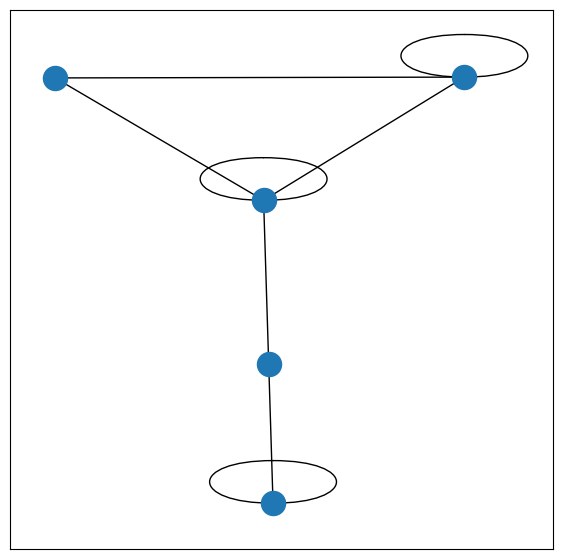

In [198]:
# vizualize the graph

from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [386]:
# final methods with comments

def is_invertible(A):
    return A.shape[0] == A.shape[1] and np.linalg.matrix_rank(A) == A.shape[0]

def fix_component(lam,lam_star,mu, W, B, p):
    print("run: fix component")
    print("B in fixed component",B)
    print("-lam[B]/p[B]",-lam[B]/p[B])
    j = np.argmin(-lam[B]/p[B])
    print("j",j)
    W_new = [int(i) for i in W if int(i)!=int(B[j])]
    print("W",W)
    #W_new = np.delete(W, B[j])
    print("new W", W_new)
    print("lam",lam)
    print("W[j]",W[j])
    print("(lam[B[j]]/p[B[j]])",(lam[B[j]]/p[B[j]]))
    lam = lam - (lam[B[j]]/p[B[j]])*p
    print("new lam",lam)
    lam_star[B[j]] = 0
    print("new lam_star")
    #mu[B[j]] = 0
    return lam,lam_star,mu, W_new          
            
    print("Done")

In [1]:
#  Debug the system below, start with one random sampled QP
# Take first one equation with different constraints
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import daqp
from self_implement_daqp_archive import daqp_self

# number of constraints
m = 5 # + 5 "small" constraints
# number of variables
n = 10

optimal_x = []
infos = []
exit_flags = []
optimal_lambda = np.zeros((100,n))
number_of_steps = []
iterations_self = []
active_sets = np.zeros((100,n))

# sample positive-semidefinite matrices by symetrizing
h = np.round(np.random.randint(1,5,(n,n)))
h= h.astype(np.float64)
H = h.T @h +np.random.randint(1,5)* np.eye(n,n)

f = np.round(np.random.randint(1,5,(n,1)))
f = f.astype(np.float64)

A = np.round(np.random.randint(1,5,(m,n)))
A = A.astype(np.float64)

b = np.round(np.random.randint(1,5,(m,1)))
b=b.astype(np.float64)

eq = np.array([[0,0,0,0,0,0,0,0,0,0]],dtype=np.int32).T
l = np.array([[-5,-5,-5,-5,-5]],dtype=np.int32).T   # lower boundary
u = np.array([[5,5,5,5,5]],dtype=np.int32).T   # upper boundary

# x: nodes - 3 variables, 2 constraints
# create new vectors filled with zeros to capture vertex features better
f1 = np.vstack((f,np.zeros(np.shape(b))))
l1 = np.vstack((l,np.zeros(np.shape(f))))
u1 = np.vstack((u,np.zeros(np.shape(f))))
b1 = np.vstack((np.zeros(np.shape(f)),b))
eq1 = np.vstack((np.zeros(np.shape(f)),eq))

#combine H and A
edge_matrix = np.block([[H,A.T],[A,np.zeros((np.shape(A)[0],np.shape(A)[0]))]])

# create matrix with vertex features
x = torch.tensor([])
for ii in range(f1.shape[0]):
    x = torch.cat((x,torch.tensor([f1[ii],l1[ii],u1[ii],b1[ii], eq1[ii]]).T),0).float()

# create edge_index and edge_attributes
edge_index = torch.tensor([])
edge_attr = torch.tensor([])
for j in range(np.shape(edge_matrix)[0]):
    for k in range(np.shape(edge_matrix)[1]):
        # add edge
        if edge_matrix[j,k] != 0:
            edge_index = torch.cat((edge_index,torch.tensor([[j,k]])),0)
            edge_attr = torch.cat((edge_attr,torch.tensor([edge_matrix[j,k]])),0)
edge_index = edge_index.long().T

bupper = np.vstack((u,b)).squeeze()
blower = np.vstack((l,-b)).squeeze()
eq = eq.squeeze()
f = f.squeeze()
# blwoer not needed
#print(H.shape,f.shape,A.shape,bupper.shape,blower.shape,eq.shape)
opt_x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,eq)
print(info)
# save the results to all the problems for later
optimal_x.append(opt_x)
exit_flags.append(exitflag)
infos.append(info.values())
#optimal_lambda[i,:] = list(info.values())[4]
optimal_lambda = list(info.values())[4]
number_of_steps.append(list(info.values())[2])
active_sets[i,:] = list(info.values())[4]
# print solutions
# print("Optimal solution:")
# print(x)
# print("Exit flag:",exitflag)
# print("Info:",info)

# get optimal active set
optimal_active_set = np.zeros(optimal_lambda.shape) # lambda has the size bc b and l are stacked
for j in range(optimal_lambda.shape[0]):
    if optimal_lambda[j]!=0:
        optimal_active_set[j]=1
y = torch.tensor(optimal_active_set) # 
data_point = Data(x= x, edge_index=edge_index, edge_attr=edge_attr,y=y)

# solve system again with optimal set and save number of iterations
print([int(x) for x in optimal_active_set])
optimal_active_set = [i for i, x in enumerate(optimal_active_set[5:]) if x == 1]
#int(x) if x==1 else None for x in optimal_active_set[5:]]
print(optimal_active_set)


NameError: name 'np' is not defined

: 

In [402]:
print("H",H)
print("f",f)
print("A",A)
print("b",b)

H [[86. 63. 67. 67. 81. 66. 79. 71. 70. 72.]
 [63. 65. 62. 60. 68. 61. 71. 59. 56. 61.]
 [67. 62. 81. 70. 71. 61. 69. 70. 65. 68.]
 [67. 60. 70. 83. 77. 62. 65. 72. 54. 63.]
 [81. 68. 71. 77. 96. 78. 72. 75. 64. 69.]
 [66. 61. 61. 62. 78. 72. 68. 60. 57. 61.]
 [79. 71. 69. 65. 72. 68. 97. 65. 76. 80.]
 [71. 59. 70. 72. 75. 60. 65. 74. 58. 60.]
 [70. 56. 65. 54. 64. 57. 76. 58. 71. 70.]
 [72. 61. 68. 63. 69. 61. 80. 60. 70. 77.]]
f [4. 4. 4. 3. 2. 1. 2. 1. 2. 1.]
A [[4. 2. 1. 2. 1. 1. 4. 1. 2. 1.]
 [2. 4. 3. 1. 4. 3. 4. 3. 3. 4.]
 [1. 4. 3. 4. 3. 2. 3. 1. 3. 4.]
 [2. 1. 2. 4. 2. 4. 1. 4. 1. 4.]
 [3. 3. 3. 1. 1. 1. 1. 1. 4. 2.]]
b [[4.]
 [4.]
 [2.]
 [1.]
 [1.]]


: 

In [398]:
l = np.array([[-5,-5,-5,-5,-5]],dtype=np.int32).T   # lower boundary

blower = np.vstack((l,-b)).squeeze()


In [263]:
# Random simulation of 100 QPs
# Take first one equation with different constraints
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
import daqp
from self_implement_daqp_archive import daqp_self

data_list = []
# number of constraints
m = 5
# number of variables
n = 10

optimal_x = []
infos = []
exit_flags = []
optimal_lambda = np.zeros((100,n))
number_of_steps = []
iterations_self = []
active_sets = np.zeros((100,n))
for i in range(100):
  # sample positive-semidefinite matrices by symetrizing
  h = np.round(np.random.randint(1,5,(n,n)))
  h= h.astype(np.float64)
  H = h.T @h +np.random.randint(1,5)* np.eye(n,n)
  
  f = np.round(np.random.randint(1,5,(n,1)))
  f = f.astype(np.float64)
  
  A = np.round(np.random.randint(1,5,(m,n)))
  A = A.astype(np.float64)
  
  b = np.round(np.random.randint(1,5,(m,1)))
  b=b.astype(np.float64)
  
  eq = np.array([[0,0,0,0,0,0,0,0,0,0]],dtype=np.int32).T
  l = np.array([[-5,-5,-5,-5,-5]],dtype=np.int32).T   # lower boundary
  u = np.array([[5,5,5,5,5]],dtype=np.int32).T   # upper boundary

  # x: nodes - 3 variables, 2 constraints
  # create new vectors filled with zeros to capture vertex features better
  f1 = np.vstack((f,np.zeros(np.shape(b))))
  l1 = np.vstack((l,np.zeros(np.shape(f))))
  u1 = np.vstack((u,np.zeros(np.shape(f))))
  b1 = np.vstack((np.zeros(np.shape(f)),b))
  eq1 = np.vstack((np.zeros(np.shape(f)),eq))

  #combine H and A
  edge_matrix = np.block([[H,A.T],[A,np.zeros((np.shape(A)[0],np.shape(A)[0]))]])

  # create matrix with vertex features
  x = torch.tensor([])
  for ii in range(f1.shape[0]):
    x = torch.cat((x,torch.tensor([f1[ii],l1[ii],u1[ii],b1[ii], eq1[ii]]).T),0).float()

# create edge_index and edge_attributes
  edge_index = torch.tensor([])
  edge_attr = torch.tensor([])
  for j in range(np.shape(edge_matrix)[0]):
    for k in range(np.shape(edge_matrix)[1]):
      # add edge
      if edge_matrix[j,k] != 0:
        edge_index = torch.cat((edge_index,torch.tensor([[j,k]])),0)
        edge_attr = torch.cat((edge_attr,torch.tensor([edge_matrix[j,k]])),0)
  edge_index = edge_index.long().T
  
  bupper = np.vstack((u,b)).squeeze()
  blower = np.vstack((l,-b)).squeeze()
  eq = eq.squeeze()
  f = f.squeeze()
  # blwoer not needed
  #print(H.shape,f.shape,A.shape,bupper.shape,blower.shape,eq.shape)
  opt_x,fval,exitflag,info = daqp.solve(H,f,A,bupper,blower,eq)
  # save the results to all the problems for later
  optimal_x.append(opt_x)
  exit_flags.append(exitflag)
  infos.append(info.values())
  #optimal_lambda[i,:] = list(info.values())[4]
  optimal_lambda = list(info.values())[4]
  number_of_steps.append(list(info.values())[2])
  active_sets[i,:] = list(info.values())[4]
  # print solutions
  # print("Optimal solution:")
  # print(x)
  # print("Exit flag:",exitflag)
  # print("Info:",info)

  # get optimal active set
  optimal_active_set = np.zeros(optimal_lambda.shape) # lambda has the size bc b and l are stacked
  for j in range(optimal_lambda.shape[0]):
    if optimal_lambda[j]!=0:
      optimal_active_set[j]=1
  y = torch.tensor(optimal_active_set) # 
  data_point = Data(x= x, edge_index=edge_index, edge_attr=edge_attr,y=y)
  
  # solve system again with optimal set and save number of iterations
  print([int(x) for x in optimal_active_set])
  optimal_active_set = [i for i, x in enumerate(optimal_active_set[5:]) if x == 1]
  #int(x) if x==1 else None for x in optimal_active_set[5:]]
  print(optimal_active_set)
  
  x_star, lam_star, W, iter = daqp_self (H,f,A,b,eq,optimal_active_set)
  iterations_self.append(iter)
  
# list of graph elements
data_list.append(data_point)
loader = DataLoader(data_list, batch_size=10,shuffle=True)


#print(data_list)
for batch in loader:
  print(batch)
  # solve the system to have the optimal output
  
  
## problem with sampling like this: not the same number of edges for each graph, makes it unfeasible for the GNN learning below


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[]
[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 1]


ValueError: shape mismatch: value array of shape (2,5) could not be broadcast to indexing result of shape (2,)

In [214]:
# average number of iterations per problem
np.mean(number_of_steps)

np.float64(10.4)

In [237]:
# analyze exit flags
from collections import Counter

Counter(exit_flags)

Counter({1: 97, -6: 3})

In [238]:
# analyze which constraints are mostly active
print(np.sum(active_sets,0)) # conclusion: the first 5 numbers are related to the constraints

counter = np.zeros((100,n))
for row in range(active_sets.shape[0]):
    for column in range(active_sets.shape[1]):
        if active_sets[row,column] !=0:
            counter[row,column] = 1
        #print(exit_flags[row])
print(np.sum(counter,0))
# optimal active set is what is given by the first 5 constraints?
y = np.hstack((np.zeros(5),active_sets[0,:5]))
print(active_sets[0,:5])
print(y)

[ 0.          0.          0.          0.          0.         -1.14393863
  0.12227827 -1.95451563 -2.52618706 -0.56455436]
[0. 0. 0. 0. 0. 8. 2. 9. 9. 4.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [207]:
# running GNN on simulated data 

import torch
from torch_geometric.data import Batch, DataLoader
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

batch = Batch.from_data_list(data_list)
loader =DataLoader(data_list,batch_size = 10,shuffle = True)
#print(batch)
#print(loader)
# node prediction: y can be one value if we do graph prediction or a vector for node prediction

# Define a simple GNN
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(5, 16)
        self.conv2 = GCNConv(16, 1)
        self.fc = torch.nn.Linear(1, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x)  # Match y's shape

# Training loop
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)  # Batch contains multiple graphs
        loss = F.mse_loss(out, batch.y.float())
        loss.backward()
        optimizer.step()
    if epoch %5 ==0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


C:\Users\Ellaa\AppData\Local\Temp\ipykernel_28952\1395479590.py:37: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, batch.y.float())


Epoch 1, Loss: 0.24079643189907074
Epoch 6, Loss: 0.24012641608715057
Epoch 11, Loss: 0.24010039865970612
Epoch 16, Loss: 0.2400517761707306
Epoch 21, Loss: 0.24002815783023834
Epoch 26, Loss: 0.24001741409301758
Epoch 31, Loss: 0.24001266062259674
Epoch 36, Loss: 0.24000971019268036
Epoch 41, Loss: 0.24000787734985352
Epoch 46, Loss: 0.24000674486160278
Epoch 51, Loss: 0.24000579118728638
Epoch 56, Loss: 0.24000447988510132
Epoch 61, Loss: 0.2400027960538864
Epoch 66, Loss: 0.24000142514705658
Epoch 71, Loss: 0.24000081419944763
Epoch 76, Loss: 0.2400006800889969
Epoch 81, Loss: 0.24000050127506256
Epoch 86, Loss: 0.24000027775764465
Epoch 91, Loss: 0.2400001734495163
Epoch 96, Loss: 0.24000012874603271


In [44]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv

# Create multiple small graphs
graphs = []
for _ in range(100):
    x = torch.randn(10, 5)  # 10 nodes, 5 features each
    edge_index = torch.randint(0, 10, (2, 20))  # 20 edges
    y = torch.tensor([1])  # Label for the graph
    graphs.append(Data(x=x, edge_index=edge_index, y=y))

# Create a DataLoader
loader = DataLoader(graphs, batch_size=10, shuffle=True)

# Define a simple GNN
class GNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(5, 16)
        self.conv2 = GCNConv(16, 1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return torch.sigmoid(x.mean(dim=0))  # Graph-level prediction

# Training loop
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(5):
    for batch in loader:
        optimizer.zero_grad()
        out = model(batch)  # Batch contains multiple graphs
        loss = F.mse_loss(out, batch.y.float())
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


c:\Users\Ellaa\Documents\Studium\Master Data Science\Master thesis\.venv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
C:\Users\Ellaa\AppData\Local\Temp\ipykernel_28952\1899795418.py:38: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out, batch.y.float())


Epoch 1, Loss: 0.06988108158111572
Epoch 2, Loss: 0.023943351581692696
Epoch 3, Loss: 0.00522983493283391
Epoch 4, Loss: 0.0015042424201965332
Epoch 5, Loss: 0.0012341856490820646


In [13]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())

print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [14]:
dataset.data

c:\Users\Ellaa\Documents\Studium\Master Data Science\Master thesis\.venv\Lib\site-packages\torch_geometric\data\in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 633,    0],
        [1862,    0],
        [2582,    0],
        ...,
        [ 598, 2707],
        [1473, 2707],
        [2706, 2707]])


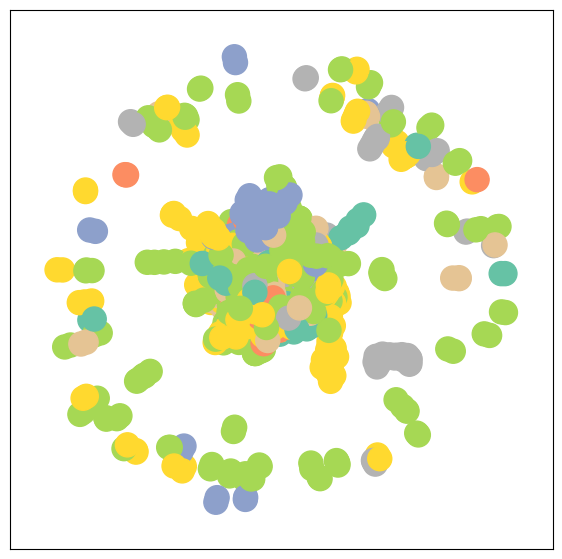

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [24]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(5,5)#dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(5,2)#hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(5, 5)
  (conv2): GCNConv(5, 2)
)


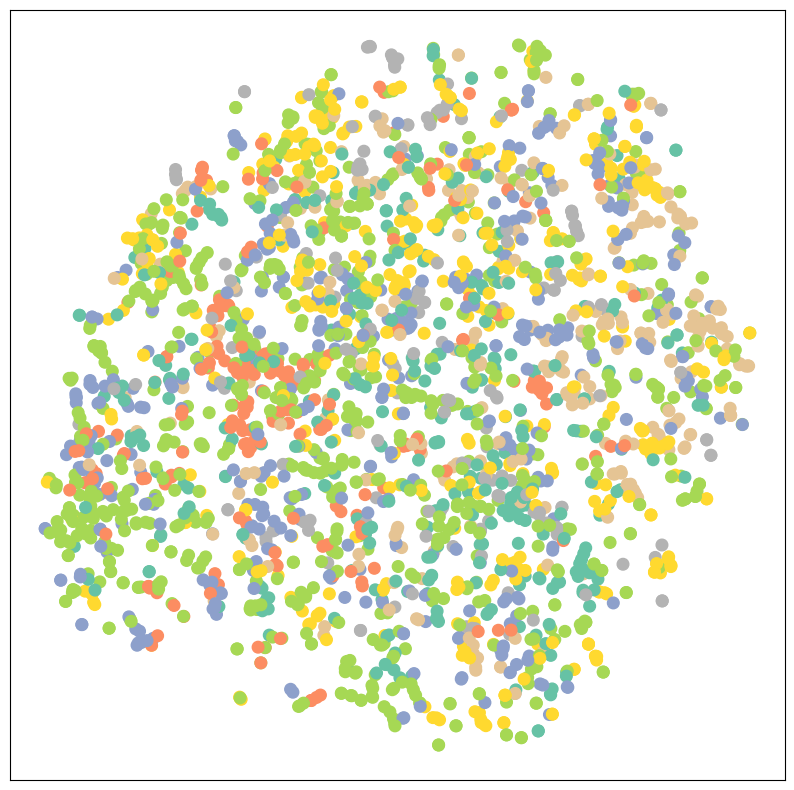

In [ ]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.9463
Epoch: 002, Loss: 1.9409
Epoch: 003, Loss: 1.9343
Epoch: 004, Loss: 1.9275
Epoch: 005, Loss: 1.9181
Epoch: 006, Loss: 1.9086
Epoch: 007, Loss: 1.9015
Epoch: 008, Loss: 1.8933
Epoch: 009, Loss: 1.8808
Epoch: 010, Loss: 1.8685
Epoch: 011, Loss: 1.8598
Epoch: 012, Loss: 1.8482
Epoch: 013, Loss: 1.8290
Epoch: 014, Loss: 1.8233
Epoch: 015, Loss: 1.8057
Epoch: 016, Loss: 1.7966
Epoch: 017, Loss: 1.7825
Epoch: 018, Loss: 1.7617
Epoch: 019, Loss: 1.7491
Epoch: 020, Loss: 1.7310
Epoch: 021, Loss: 1.7147
Epoch: 022, Loss: 1.7056
Epoch: 023, Loss: 1.6954
Epoch: 024, Loss: 1.6697
Epoch: 025, Loss: 1.6538
Epoch: 026, Loss: 1.6312
Epoch: 027, Loss: 1.6161
Epoch: 028, Loss: 1.5899
Epoch: 029, Loss: 1.5711
Epoch: 030, Loss: 1.5576
Epoch: 031, Loss: 1.5393
Epoch: 032, Loss: 1.5137
Epoch: 033, Loss: 1.4948
Epoch: 034, Loss: 1.4913
Epoch: 035, Loss: 1.4698
Epoch: 036, Loss: 1.3998
Epoch: 037, Loss: 1.4041
Epoch: 038, Loss: 1.3761
Epoch: 039, Loss: 1.3631
Epoch: 040, Loss: 1.3258


In [ ]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8150


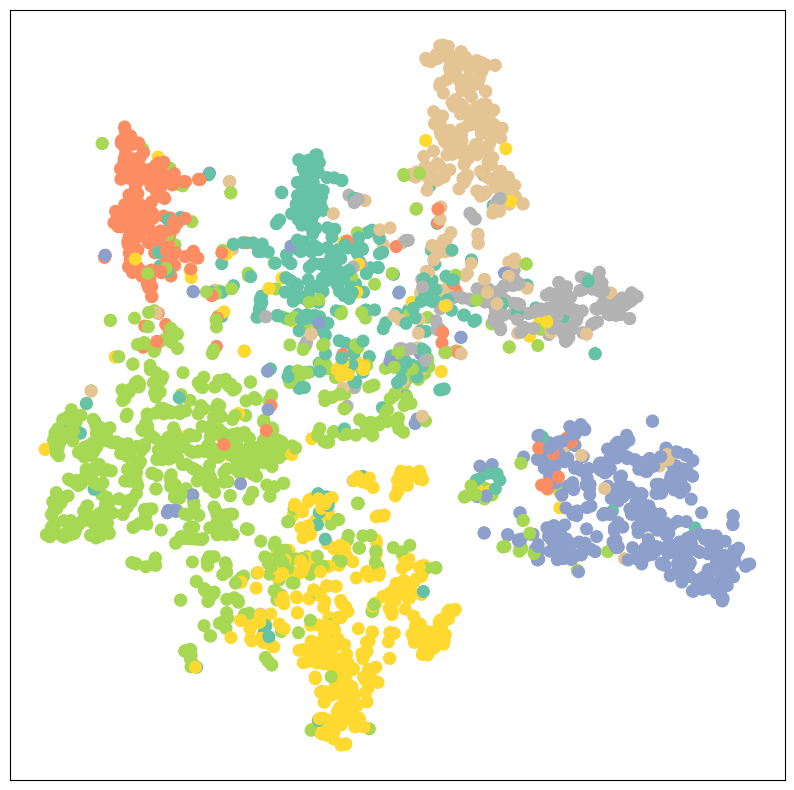

In [ ]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)